### Create figures from saved csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Read csv-files

In [8]:
pretrain_data = pd.read_csv('/home/filip-marcus/results/eneryield/pretrain_10_04_2025.csv')
class_dist_baseline = pd.read_csv('/home/filip-marcus/results/eneryield/class_dist_baseline.csv')
event_label_baseline = pd.read_csv('/home/filip-marcus/results/eneryield/event_label_baseline.csv')
event_label_baseline

,train_loss,event_label_preds,event_label_labels
0,26.077274,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,61.231842,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,42.189888,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,35.637394,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,46.956474,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...
235,11.729431,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
236,24.156307,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
237,11.302710,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
238,0.496386,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


### Settings

In [4]:
cmap = plt.get_cmap('mako')

### Event label confusion matrix

Text(69.0, 0.5, 'Actual')

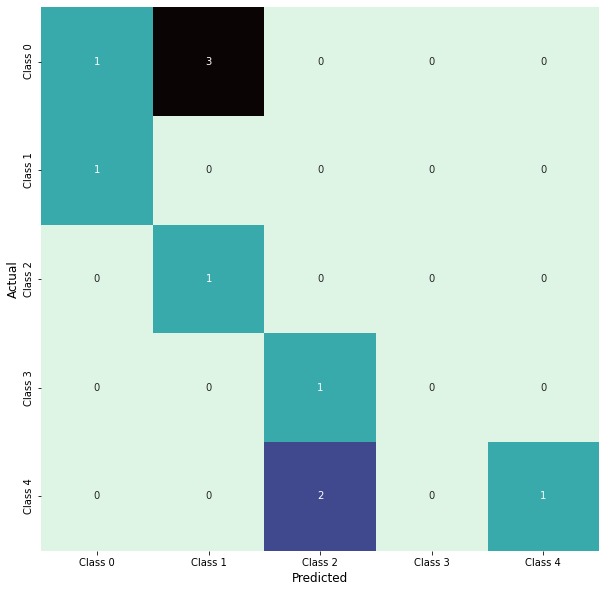

In [15]:
preds = [1, 3, 2, 4, 5, 1, 1, 5, 5, 1]
labels = [2, 2, 1, 3, 5, 2, 2, 3, 3, 1]

cm = confusion_matrix(preds, labels)

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako_r', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
# plt.title('Confusion Matrix', fontsize=20)

### Forgetting curve

### Total learning curve

6.0


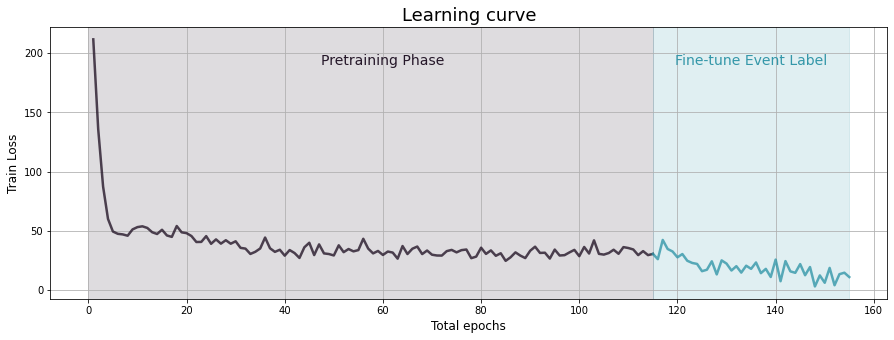

In [11]:
# pretrain
loss_pretrain = np.array(pretrain_data['train_loss'])
num_epochs_pretrain = 115
steps_per_epoch = len(loss_pretrain) / num_epochs_pretrain
train_loss_pretrain = loss_pretrain[::int(steps_per_epoch)]

# # finetune 1: class_dist_baseline
# class_dist_baseline_train_loss = np.array(class_dist_baseline['train_loss'])
# num_epochs_finetune_1 = 200
# steps_per_epoch = len(class_dist_baseline_train_loss) / num_epochs_finetune_1
# train_loss = np.concatenate((train_loss_pretrain, class_dist_baseline_train_loss[::int(steps_per_epoch)]))

# finetune 2: event_label_baseline
event_label_baseline_train_loss = np.array(event_label_baseline['train_loss'])
num_epochs_finetune_2 = 40
steps_per_epoch = len(event_label_baseline_train_loss) / num_epochs_finetune_2
train_loss = np.concatenate((train_loss_pretrain, event_label_baseline_train_loss[::int(steps_per_epoch)]))


print(steps_per_epoch)

num_epochs_total = num_epochs_pretrain + num_epochs_finetune_2
epochs = np.arange(1, num_epochs_total + 1)

line_color = cmap(0.5)
pretrain_shade_color = cmap(0.1)
finetune_1_shade_color = cmap(0.6)

# -----------------------------------------PLOTTING--------------------------------------------
plt.figure(figsize=(15, 5))

# pretrain
plt.axvspan(0, num_epochs_pretrain, color=pretrain_shade_color, alpha=0.15, label='Pretrain phase')
plt.text(x=60, y=max(train_loss) * 0.9, s="Pretraining Phase", fontsize=14, color=pretrain_shade_color, ha='center')

# # class dist
# plt.axvspan(num_epochs_pretrain, num_epochs_total, color=finetune_1_shade_color, alpha=0.15, label='Fine-tune Class Distribution')
# plt.text(x=225, y=max(train_loss) * 0.9, s="Fine-tune Class Distribution", fontsize=14, color=finetune_1_shade_color, ha='center')

# event label
plt.axvspan(num_epochs_pretrain, num_epochs_total, color=finetune_1_shade_color, alpha=0.15, label='Fine-tune Event Label')
plt.text(x=135, y=max(train_loss) * 0.9, s="Fine-tune Event Label", fontsize=14, color=finetune_1_shade_color, ha='center')


plt.plot(epochs[:num_epochs_pretrain], train_loss[:num_epochs_pretrain], label='Train Loss (Pretrain)',color=pretrain_shade_color, linewidth=2.5, alpha=0.8)
plt.plot(epochs[num_epochs_pretrain - 1:], train_loss[num_epochs_pretrain - 1:], label='Train Loss (Finetune)', color=finetune_1_shade_color, linewidth=2.5, alpha=0.8)
plt.title('Learning curve', fontsize=18)
plt.xlabel('Total epochs', fontsize=12)    
plt.ylabel('Train Loss', fontsize=12)
plt.grid(True)
# plt.yscale('log')